In [17]:
!pip install pyspark 
# install pyspark and its dependencies

# LOAD AND CLEAN DATA

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [19]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('spark').getOrCreate()

In [20]:
spark
#check spark session

In [21]:
#load dataset
data=pd.read_csv('room_booking.csv')
data=data.drop(['Unnamed: 0','aulaId'],axis=1)


In [22]:
type(data.date_x[0])

str

In [23]:
data.date_x=pd.to_datetime(data.date_x)

In [24]:
data['day']=data.date_x.dt.weekday
data['hour']=data.date_x.dt.hour
data['minute']=data.date_x.dt.minute
data['dayName']=data.date_x.dt.day_name()


In [25]:
data

,room,date_x,Sede,aulaDes,capienza,poloDes,bookings,day,hour,minute,dayName
0,5f5bd5fafc7a3450ea06e81c,2020-11-08 17:10:20.328000+00:00,1,112,11,26,26,6,17,10,Sunday
1,5f5bd5fafc7a3450ea06e81c,2020-11-09 08:18:33.344000+00:00,1,112,11,26,38,0,8,18,Monday
2,5f5bd5fafc7a3450ea06e81c,2020-11-12 07:45:37.079000+00:00,1,112,11,26,21,3,7,45,Thursday
3,5f5bd5fafc7a3450ea06e81c,2020-11-12 09:00:15.960000+00:00,1,112,11,26,31,3,9,0,Thursday
4,5f5bd5fafc7a3450ea06e81c,2020-11-13 07:55:08.231000+00:00,1,112,11,26,23,4,7,55,Friday
...,...,...,...,...,...,...,...,...,...,...,...
189,5f5cc686fc7a3450ea06e837,2020-12-18 09:34:41.628000+00:00,4,114,4,9,1,4,9,34,Friday
190,5f5b4fdd400b9fbfbe0b8eee,2020-11-24 11:31:47.928000+00:00,2,58,31,4,1,1,11,31,Tuesday
191,5f5cc627fc7a3450ea06e836,2020-11-26 17:25:37.632000+00:00,2,114,3,20,1,3,17,25,Thursday
192,5f5b4fdd400b9fbfbe0b8efd,2020-12-01 14:13:23.390000+00:00,2,67,42,4,2,1,14,13,Tuesday


In [27]:
#create a spark dataframe from the pandas dataframe
df=spark.createDataFrame(data)


In [29]:
df.show()

+--------------------+--------------------+----+-------+--------+-------+--------+---+----+------+---------+
|                room|              date_x|Sede|aulaDes|capienza|poloDes|bookings|day|hour|minute|  dayName|
+--------------------+--------------------+----+-------+--------+-------+--------+---+----+------+---------+
|5f5bd5fafc7a3450e...|2020-11-08 18:10:...|   1|    112|      11|     26|      26|  6|  17|    10|   Sunday|
|5f5bd5fafc7a3450e...|2020-11-09 09:18:...|   1|    112|      11|     26|      38|  0|   8|    18|   Monday|
|5f5bd5fafc7a3450e...|2020-11-12 08:45:...|   1|    112|      11|     26|      21|  3|   7|    45| Thursday|
|5f5bd5fafc7a3450e...|2020-11-12 10:00:...|   1|    112|      11|     26|      31|  3|   9|     0| Thursday|
|5f5bd5fafc7a3450e...|2020-11-13 08:55:...|   1|    112|      11|     26|      23|  4|   7|    55|   Friday|
|5f5bd5fafc7a3450e...|2020-11-16 18:14:...|   1|    112|      11|     26|      19|  0|  17|    14|   Monday|
|5f5bd5fafc7a3450e.

In [30]:
df.toPandas()
#show dataframe

,room,date_x,Sede,aulaDes,capienza,poloDes,bookings,day,hour,minute,dayName
0,5f5bd5fafc7a3450ea06e81c,2020-11-08 18:10:20.328,1,112,11,26,26,6,17,10,Sunday
1,5f5bd5fafc7a3450ea06e81c,2020-11-09 09:18:33.344,1,112,11,26,38,0,8,18,Monday
2,5f5bd5fafc7a3450ea06e81c,2020-11-12 08:45:37.079,1,112,11,26,21,3,7,45,Thursday
3,5f5bd5fafc7a3450ea06e81c,2020-11-12 10:00:15.960,1,112,11,26,31,3,9,0,Thursday
4,5f5bd5fafc7a3450ea06e81c,2020-11-13 08:55:08.231,1,112,11,26,23,4,7,55,Friday
...,...,...,...,...,...,...,...,...,...,...,...
189,5f5cc686fc7a3450ea06e837,2020-12-18 10:34:41.628,4,114,4,9,1,4,9,34,Friday
190,5f5b4fdd400b9fbfbe0b8eee,2020-11-24 12:31:47.928,2,58,31,4,1,1,11,31,Tuesday
191,5f5cc627fc7a3450ea06e836,2020-11-26 18:25:37.632,2,114,3,20,1,3,17,25,Thursday
192,5f5b4fdd400b9fbfbe0b8efd,2020-12-01 15:13:23.390,2,67,42,4,2,1,14,13,Tuesday


In [33]:
#get the no.of rows & columns
print(df.count(),len(df.columns))



194 11


In [38]:
for i in df.columns:
  print(i+":",df[df[i].isNull()].count())

room: 0
date_x: 0
Sede: 0
aulaDes: 0
capienza: 0
poloDes: 0
bookings: 0
day: 0
hour: 0
minute: 0
dayName: 0


# DATA INSIGHTS

In [39]:
#print schema 
df.printSchema()

root
 |-- room: string (nullable = true)
 |-- date_x: timestamp (nullable = true)
 |-- Sede: long (nullable = true)
 |-- aulaDes: long (nullable = true)
 |-- capienza: long (nullable = true)
 |-- poloDes: long (nullable = true)
 |-- bookings: long (nullable = true)
 |-- day: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- minute: long (nullable = true)
 |-- dayName: string (nullable = true)



In [40]:
df.describe().show()

+-------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------+
|summary|                room|              Sede|           aulaDes|          capienza|           poloDes|          bookings|               day|              hour|            minute|  dayName|
+-------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------+
|  count|                 194|               194|               194|               194|               194|               194|               194|               194|               194|      194|
|   mean|                null|1.3298969072164948| 100.9020618556701| 16.25257731958763|15.541237113402062| 16.74742268041237|2.2628865979381443|13.144329896907216|29.427835051546392|     null|
| stddev|                null|0.764

# CORRELATION AND FEATURE SELECTION


In [123]:
data.corr()

,Sede,aulaDes,capienza,poloDes,bookings,day,hour,minute
Sede,1.000000,0.159388,-0.298662,-0.088456,-0.229743,0.007580,0.130355,-0.135510
aulaDes,0.159388,1.000000,-0.352391,0.519903,0.219002,0.157199,-0.085940,-0.025844
capienza,-0.298662,-0.352391,1.000000,0.345158,0.623048,0.102633,0.090630,0.048213
poloDes,-0.088456,0.519903,0.345158,1.000000,0.618346,0.152257,-0.037375,0.070531
bookings,-0.229743,0.219002,0.623048,0.618346,1.000000,0.129788,-0.010917,0.097370
day,0.007580,0.157199,0.102633,0.152257,0.129788,1.000000,0.120686,-0.045591
hour,0.130355,-0.085940,0.090630,-0.037375,-0.010917,0.120686,1.000000,-0.050312
minute,-0.135510,-0.025844,0.048213,0.070531,0.097370,-0.045591,-0.050312,1.000000


<AxesSubplot:>

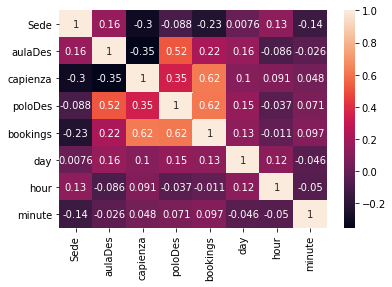

In [124]:
# correlation matrix using a heatmap with seabron and matplotlib
sns.heatmap(data.corr(),annot=True)


In [125]:
# feature selection
from pyspark.ml.feature import VectorAssembler
assembler= VectorAssembler(inputCols=['poloDes','aulaDes','capienza'],outputCol='features')


In [126]:
#display dataframe
output_data= assembler.transform(df)
#helps to produce a new column called features
output_data.toPandas()

,room,date_x,Sede,aulaDes,capienza,poloDes,bookings,day,hour,minute,dayName,features
0,5f5bd5fafc7a3450ea06e81c,2020-11-08 18:10:20.328,1,112,11,26,26,6,17,10,Sunday,"[26.0, 112.0, 11.0]"
1,5f5bd5fafc7a3450ea06e81c,2020-11-09 09:18:33.344,1,112,11,26,38,0,8,18,Monday,"[26.0, 112.0, 11.0]"
2,5f5bd5fafc7a3450ea06e81c,2020-11-12 08:45:37.079,1,112,11,26,21,3,7,45,Thursday,"[26.0, 112.0, 11.0]"
3,5f5bd5fafc7a3450ea06e81c,2020-11-12 10:00:15.960,1,112,11,26,31,3,9,0,Thursday,"[26.0, 112.0, 11.0]"
4,5f5bd5fafc7a3450ea06e81c,2020-11-13 08:55:08.231,1,112,11,26,23,4,7,55,Friday,"[26.0, 112.0, 11.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
189,5f5cc686fc7a3450ea06e837,2020-12-18 10:34:41.628,4,114,4,9,1,4,9,34,Friday,"[9.0, 114.0, 4.0]"
190,5f5b4fdd400b9fbfbe0b8eee,2020-11-24 12:31:47.928,2,58,31,4,1,1,11,31,Tuesday,"[4.0, 58.0, 31.0]"
191,5f5cc627fc7a3450ea06e836,2020-11-26 18:25:37.632,2,114,3,20,1,3,17,25,Thursday,"[20.0, 114.0, 3.0]"
192,5f5b4fdd400b9fbfbe0b8efd,2020-12-01 15:13:23.390,2,67,42,4,2,1,14,13,Tuesday,"[4.0, 67.0, 42.0]"


# Build The Regression Model

In [127]:
#import Linearregression and create final data


In [128]:
from pyspark.ml.regression import LinearRegression
final_data =output_data.select('features','bookings')

In [129]:
#print schema of final data
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- bookings: long (nullable = true)



In [130]:
#split the dataset into training and testing set
train , test = final_data.randomSplit([0.70,0.30])

In [131]:
#build & train the linear regression model
models = LinearRegression(featuresCol='features',labelCol='bookings')
model= models.fit(train)

In [132]:
#get coefficients & intercept
print('coefficients:',model.coefficients)
print('intercept:',model.intercept)

coefficients: [0.7134053703378904,0.29346101197079916,1.7788239606613894]
intercept: -52.39575290275056


In [133]:
#get summary of the model
summary=model.summary
print('RMSE',summary.rootMeanSquaredError)
#measure of how well a model performs, small rmse value is good
print('R2 scrore:',summary.r2)
#the better the R squared score the better the model fits the data

RMSE 17.214753609770614
R2 scrore: 0.614476912871105


# Evaluate the model

In [136]:


#transform on the test data
predictions=model.transform(test)


In [137]:
#display the predictions
predictions.toPandas()

,features,bookings,prediction
0,"[26.0, 112.0, 11.0]",13,18.587484
1,"[26.0, 112.0, 11.0]",14,18.587484
2,"[26.0, 112.0, 11.0]",14,18.587484
3,"[26.0, 112.0, 11.0]",17,18.587484
4,"[26.0, 112.0, 11.0]",21,18.587484
5,"[26.0, 112.0, 11.0]",33,18.587484
6,"[10.0, 115.0, 10.0]",1,6.274557
7,"[10.0, 115.0, 10.0]",2,6.274557
8,"[10.0, 115.0, 10.0]",2,6.274557
9,"[10.0, 115.0, 10.0]",8,6.274557


In [138]:
#evaluate the model 
from pyspark.ml.evaluation import RegressionEvaluator
evaluator= RegressionEvaluator(predictionCol='prediction',labelCol='bookings',metricName='r2')
print('test data r2 value:',evaluator.evaluate(predictions))

test data r2 value: 0.6328372386115991
